In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
#from xgboost import XGBClassifier
#from sklearn.cross_validation import cross_val_score, StratifiedKFold
#from sklearn import cross_validation, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pylab import rcParams
rcParams['figure.figsize'] = 15,3

In [141]:
nrows = 100000

#X = pd.read_csv('../input/train_numeric.csv', index_col=0, nrows=nrows, usecols = list(range(969)))
#y = pd.read_csv('../input/train_numeric.csv', index_col=0, nrows=nrows, usecols=[0,969])
X = pd.read_csv('../input/train_numeric.csv', index_col=0, nrows=nrows)


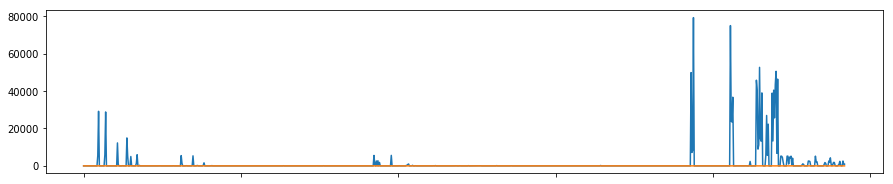

In [33]:
k = X.kurt()
plt.figure(figsize=(15,3))
k.plot()
X.std().plot()

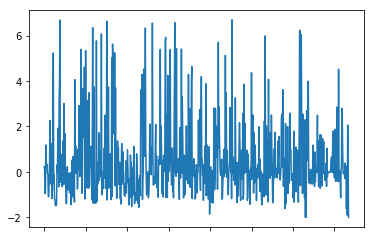

In [14]:
k[k<7].plot()

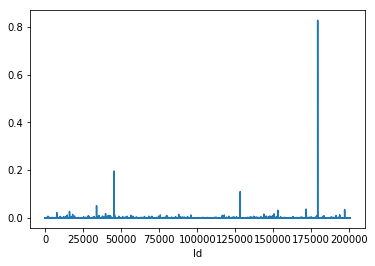

In [17]:
X[k.idxmax()].plot()

In [30]:
k.idxmax()

'L3_S29_F3491'

In [49]:
(k).sort_values().index.tolist()

['L3_S50_F4253',
 'L3_S29_F3470',
 'L3_S29_F3464',
 'L3_S49_F4236',
 'L1_S25_F2322',
 'L3_S48_F4193',
 'L2_S28_F3248',
 'L1_S24_F1361',
 'L1_S24_F1260',
 'L0_S7_F136',
 'L0_S7_F138',
 'L0_S6_F132',
 'L1_S25_F2915',
 'L1_S24_F1225',
 'L0_S14_F362',
 'L1_S25_F2758',
 'L1_S24_F1102',
 'L1_S24_F1230',
 'L2_S28_F3259',
 'L0_S12_F336',
 'L1_S24_F1303',
 'L0_S12_F334',
 'L1_S24_F746',
 'L1_S24_F766',
 'L1_S24_F775',
 'L1_S24_F785',
 'L1_S24_F780',
 'L1_S24_F1351',
 'L1_S25_F2385',
 'L0_S8_F144',
 'L1_S25_F3026',
 'L1_S25_F2623',
 'L1_S25_F2356',
 'L3_S29_F3360',
 'L3_S29_F3398',
 'L0_S15_F403',
 'L1_S25_F2997',
 'L1_S24_F795',
 'L1_S25_F3028',
 'L1_S25_F2828',
 'L1_S25_F2243',
 'L1_S25_F2677',
 'L1_S25_F2743',
 'L1_S24_F1331',
 'L1_S24_F935',
 'L1_S24_F719',
 'L0_S6_F122',
 'L1_S24_F1366',
 'L1_S24_F993',
 'L1_S24_F1411',
 'L1_S25_F1929',
 'L1_S25_F2460',
 'L1_S25_F2714',
 'L0_S22_F586',
 'L1_S25_F2164',
 'L1_S25_F2307',
 'L1_S25_F2370',
 'L1_S25_F2545',
 'L0_S3_F80',
 'L1_S25_F2906',
 'L1_S2

In [31]:
(-k).sort_values().index.tolist()

['L3_S29_F3491',
 'L3_S30_F3724',
 'L3_S34_F3876',
 'L3_S37_F3946',
 'L3_S29_F3482',
 'L3_S37_F3950',
 'L3_S33_F3867',
 'L3_S37_F3944',
 'L3_S36_F3934',
 'L3_S33_F3869',
 'L3_S34_F3882',
 'L3_S36_F3926',
 'L3_S30_F3739',
 'L0_S2_F52',
 'L0_S3_F88',
 'L3_S35_F3903',
 'L3_S36_F3938',
 'L3_S30_F3729',
 'L3_S30_F3734',
 'L3_S35_F3913',
 'L0_S9_F205',
 'L3_S34_F3878',
 'L3_S36_F3930',
 'L3_S34_F3880',
 'L0_S8_F146',
 'L3_S33_F3873',
 'L3_S33_F3871',
 'L3_S29_F3488',
 'L3_S29_F3485',
 'L3_S37_F3948',
 'L0_S10_F274',
 'L0_S3_F84',
 'L3_S35_F3898',
 'L3_S35_F3908',
 'L1_S24_F1840',
 'L1_S24_F1768',
 'L0_S2_F48',
 'L0_S20_F463',
 'L0_S21_F537',
 'L3_S40_F3988',
 'L3_S39_F3964',
 'L3_S40_F3990',
 'L3_S39_F3968',
 'L3_S45_F4128',
 'L3_S41_F3998',
 'L0_S9_F210',
 'L0_S10_F234',
 'L3_S40_F3994',
 'L3_S39_F3972',
 'L3_S48_F4204',
 'L3_S41_F3996',
 'L3_S41_F4002',
 'L1_S24_F1793',
 'L1_S24_F1783',
 'L3_S44_F4103',
 'L3_S51_F4258',
 'L3_S48_F4200',
 'L3_S44_F4106',
 'L3_S50_F4249',
 'L3_S31_F3846',
 '

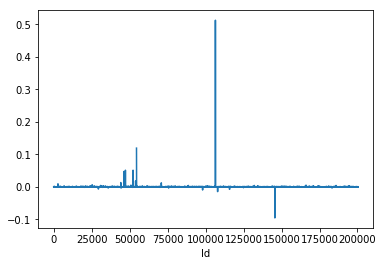

In [32]:
X['L3_S30_F3724'].plot()

In [58]:
X.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [62]:
len(X['L3_S29_F3470'].unique())

3

In [61]:
len(X['L3_S29_F3470'].value_counts())

2

列を見ていく

In [144]:
d = []
for i in range(0, len(X.columns)):
#    d.append(len(X.iloc[i].value_counts()))
    d.append(len(X.iloc[:,i].unique()))


In [101]:
for i in range(0, len(X)):
    if d[i] < 10:
        X.iloc[i].astype('category')


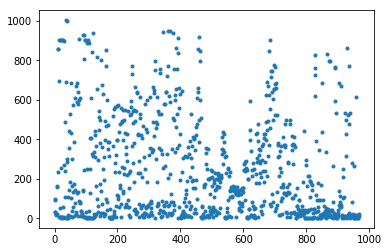

In [138]:
plt.plot(pd.DataFrame(d), ".")
#plt.plot(pd.DataFrame(d).iloc[tmp_k], ".")

In [146]:
d[-1]

2

In [200]:
d_tmp = d
d_tmp.sort()

In [201]:
d_tmp

[2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 2

行を見ていく

In [143]:
dr = []
for i in range(0, len(X)):
#    d.append(len(X.iloc[i].value_counts()))
    dr.append(len(X.iloc[i,:].unique()))


In [176]:
df_dr = pd.DataFrame(dr)
df_dr["Id"] = X.index
df_dr.reset_index()
df_dr = df_dr.set_index("Id")
df_dr["Response"] = X["Response"]

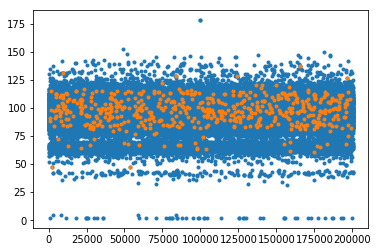

In [199]:
plt.plot(df_dr.iloc[:,0], ".")
#plt.plot(pd.DataFrame(d).iloc[tmp_k], ".")
plt.plot(df_dr[df_dr["Response"]==1].iloc[:,0], ".")

In [74]:
tmp_k = (7<X.kurt()) * list(range(0,len(X.columns)))
tmp_k[tmp_k==0] = np.NaN
tmp_k = tmp_k.dropna()
tmp_k = tmp_k.astype(int)

In [122]:
np.argmin(d)

370

In [123]:
X.columns[np.argmin(d)]

'L1_S24_F1773'

In [135]:
X[X.columns[np.argmin(d)]].unique()

array([   nan, -0.03 , -0.009, -0.019,  0.001,  0.024, -0.007, -0.027,
       -0.036, -0.001, -0.022, -0.003,  0.016, -0.002,  0.014,  0.043,
        0.006,  0.035, -0.015,  0.013,  0.007,  0.009, -0.026,  0.017,
        0.011, -0.02 ,  0.004, -0.031, -0.028, -0.006, -0.005,  0.02 ,
        0.002,  0.026, -0.016,  0.054, -0.011,  0.03 ,  0.053,  0.045,
       -0.018, -0.012, -0.004,  0.023,  0.003,  0.012, -0.024, -0.013,
       -0.014, -0.021,  0.008, -0.032, -0.029, -0.047,  0.049,  0.018,
       -0.017,  0.   ,  0.01 ,  0.021, -0.025,  0.005, -0.01 ,  0.019,
        0.028, -0.023,  0.046, -0.008, -0.034,  0.015,  0.044,  0.029,
       -0.035,  0.038,  0.05 ,  0.042,  0.022, -0.049, -0.04 ,  0.032,
        0.074,  0.025,  0.051,  0.062,  0.034,  0.031,  0.039, -0.033,
        0.047,  0.036, -0.046,  0.04 ,  0.033,  0.037,  0.048, -0.052,
       -0.039,  0.055,  0.027,  0.041, -0.037,  0.067, -0.917, -0.045,
       -0.038, -0.053, -0.048, -0.042,  0.064, -0.043, -0.041,  0.052,
      

In [134]:
X.iloc[:,np.argmin(d)-1].unique()

array([   nan, -0.001,  0.   , -0.002,  0.001,  0.004, -0.004,  0.002,
        0.003, -0.003, -0.006,  0.925, -0.01 , -0.005,  0.006,  0.007,
        0.005, -0.009])

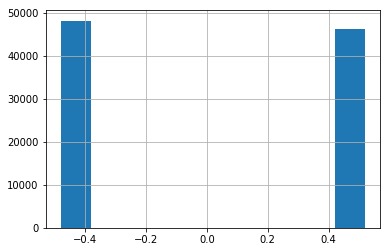

In [52]:
X['L3_S29_F3470'].hist()

In [41]:
s = X.std()
X[(X < -s*1.96) | (s*1.96 < X)] = np.NaN

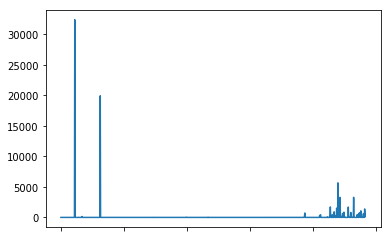

In [42]:
X.kurt().plot()

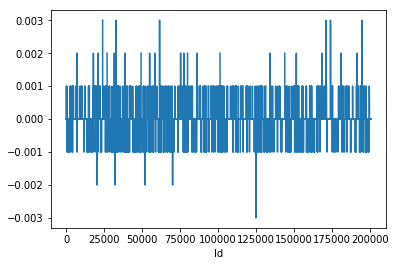

In [43]:
X['L3_S30_F3724'].plot()

In [48]:
X['L3_S30_F3724'].dtype

dtype('float64')

In [18]:
X_suc = X.loc[y["Response"]==0,:]
X_fai = X.loc[y["Response"]==1,:]

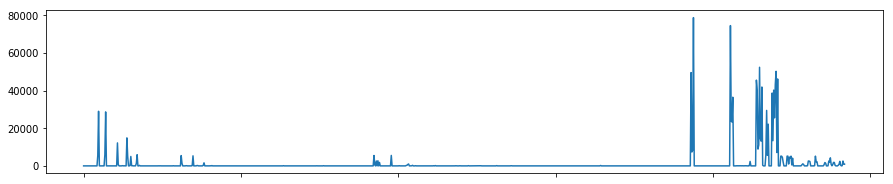

In [19]:
k_suc = X_suc.kurt()
plt.figure(figsize=(15,3))
k_suc.plot()

In [5]:
X.describe()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
count,28855.000000,28855.000000,28855.000000,28855.000000,28855.000000,28855.000000,28855.000000,28855.000000,28855.000000,28855.000000,...,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,2582.000000,2582.000000,2582.000000,2582.000000
mean,-0.001345,-0.001928,0.000487,0.000621,0.000640,0.004447,0.000281,0.001824,-0.000722,-0.000458,...,-0.003204,-0.000004,0.000018,0.000845,0.000183,0.004947,-0.000007,0.000780,0.000517,0.000081
std,0.079993,0.092766,0.211900,0.211993,0.093729,0.162436,0.019365,0.104185,0.114759,0.113283,...,0.154576,0.000062,0.000232,0.025345,0.002125,0.250046,0.000083,0.027826,0.012785,0.001213
min,-0.402000,-0.474000,-0.397000,-0.397000,-0.404000,-0.566000,-0.044000,-0.232000,-0.393000,-0.415000,...,-0.349000,-0.001000,0.000000,0.000000,0.000000,-0.250000,-0.001000,0.000000,0.000000,0.000000
25%,-0.055000,-0.064000,-0.179000,-0.179000,-0.056000,-0.066000,-0.015000,-0.072000,-0.082000,-0.078000,...,-0.114750,0.000000,0.000000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.070000,0.000000,-0.032000,0.000000,0.002000,...,-0.033000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
75%,0.056000,0.063000,0.294000,0.294000,0.074000,0.116000,0.015000,0.088000,0.076000,0.077000,...,0.083750,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
max,0.278000,0.280000,0.567000,0.566000,0.422000,0.388000,0.096000,0.528000,0.469000,0.537000,...,0.589000,0.000000,0.006000,0.900000,0.045000,0.250000,0.000000,1.000000,0.441000,0.038000


In [6]:
y.describe()

,Response
count,50000.000000
mean,0.005420
std,0.073422
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [3]:
X_suc = X.loc[y["Response"]==0,:]
X_fai = X.loc[y["Response"]==1,:]

In [8]:
X_suc.describe()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
count,28721.000000,28721.000000,28721.000000,28721.000000,28721.00000,28721.000000,28721.000000,28721.000000,28721.000000,28721.000000,...,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,1306.000000,2569.000000,2569.000000,2569.000000,2569.000000
mean,-0.001367,-0.001960,0.000642,0.000788,0.00061,0.004438,0.000291,0.001869,-0.000675,-0.000440,...,-0.002926,-0.000004,0.000018,0.000850,0.000184,0.004594,-0.000007,0.000784,0.000520,0.000081
std,0.080003,0.092793,0.211996,0.212082,0.09370,0.162368,0.019364,0.104190,0.114775,0.113279,...,0.154127,0.000062,0.000233,0.025422,0.002132,0.250054,0.000083,0.027897,0.012818,0.001216
min,-0.402000,-0.474000,-0.397000,-0.397000,-0.40400,-0.566000,-0.044000,-0.232000,-0.393000,-0.415000,...,-0.349000,-0.001000,0.000000,0.000000,0.000000,-0.250000,-0.001000,0.000000,0.000000,0.000000
25%,-0.055000,-0.064000,-0.179000,-0.179000,-0.05600,-0.066000,-0.015000,-0.072000,-0.082000,-0.078000,...,-0.114000,0.000000,0.000000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000
50%,0.003000,0.004000,-0.033000,-0.034000,0.03100,0.070000,0.000000,-0.032000,0.000000,0.002000,...,-0.033000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
75%,0.056000,0.063000,0.294000,0.294000,0.07400,0.116000,0.015000,0.088000,0.076000,0.077000,...,0.083750,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000
max,0.278000,0.280000,0.567000,0.566000,0.42200,0.388000,0.096000,0.528000,0.469000,0.537000,...,0.589000,0.000000,0.006000,0.900000,0.045000,0.250000,0.000000,1.000000,0.441000,0.038000


In [9]:
X_fai.describe()

,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,L0_S0_F18,...,L3_S50_F4243,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262
count,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,...,8.000000,8.0,8.0,8.0,8.0,8.000000,13.0,13.0,13.0,13.0
mean,0.003500,0.004910,-0.032701,-0.035231,0.007112,0.006381,-0.001828,-0.007821,-0.010799,-0.004313,...,-0.048500,0.0,0.0,0.0,0.0,0.062500,0.0,0.0,0.0,0.0
std,0.077892,0.086868,0.187922,0.189243,0.099933,0.177134,0.019502,0.103126,0.111231,0.114473,...,0.225462,0.0,0.0,0.0,0.0,0.258775,0.0,0.0,0.0,0.0
min,-0.212000,-0.272000,-0.361000,-0.379000,-0.360000,-0.521000,-0.044000,-0.232000,-0.240000,-0.281000,...,-0.188000,0.0,0.0,0.0,0.0,-0.250000,0.0,0.0,0.0,0.0
25%,-0.049000,-0.049000,-0.179000,-0.197000,-0.056000,-0.066000,-0.015000,-0.072000,-0.092000,-0.088000,...,-0.184500,0.0,0.0,0.0,0.0,-0.250000,0.0,0.0,0.0,0.0
50%,0.006500,0.015000,-0.033000,-0.034000,0.031000,0.070000,-0.003500,-0.032000,-0.005000,-0.003000,...,-0.150000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0
75%,0.049000,0.063000,0.003000,0.003000,0.074000,0.149750,0.008000,0.048000,0.059750,0.072000,...,-0.036250,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0
max,0.193000,0.220000,0.367000,0.366000,0.248000,0.206000,0.059000,0.368000,0.296000,0.430000,...,0.461000,0.0,0.0,0.0,0.0,0.250000,0.0,0.0,0.0,0.0


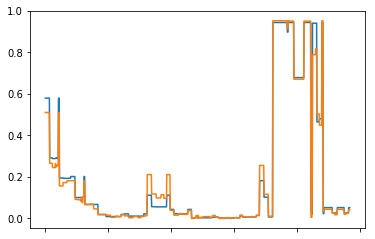

In [6]:
(X_suc.count()/len(X_suc)).plot()
(X_fai.count()/len(X_fai)).plot()

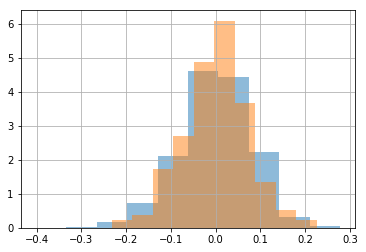

In [17]:
X_suc.loc[:,"L0_S0_F0"].hist(density=True, alpha=0.5)
X_fai.loc[:,"L0_S0_F0"].hist(density=True, alpha=0.5)

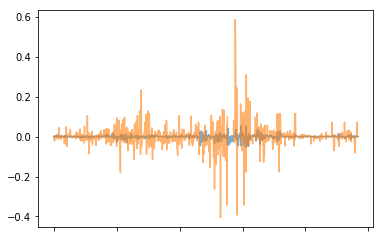

In [11]:
(X_suc.mean()).plot(alpha=0.6)
(X_fai.mean()).plot(alpha=0.6)

In [20]:
(X_fai.mean()).idxmax()

'L1_S25_F2632'

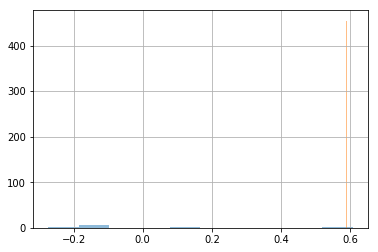

In [24]:
X_suc.loc[:,"L1_S25_F2632"].hist(density=True, alpha=0.5)
X_fai.loc[:,"L1_S25_F2632"].hist(density=True, alpha=0.5)

In [25]:
X_fai.loc[:,"L1_S25_F2632"].describe()

count    2.000000
mean     0.584500
std      0.007778
min      0.579000
25%      0.581750
50%      0.584500
75%      0.587250
max      0.590000
Name: L1_S25_F2632, dtype: float64

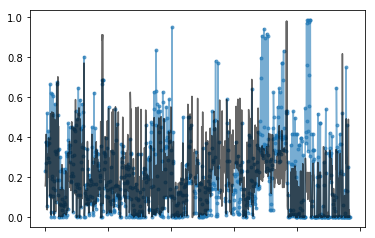

In [39]:
#X_fai.min().plot(alpha=0.6, kind='line', marker='.')
X_fai.abs().max().plot(alpha=0.6, kind='line', marker='.')
(X_suc.std()*1.96).plot(alpha=0.6, color='k')
#(-X_suc.std()*1.96).plot(alpha=0.6, color='k')


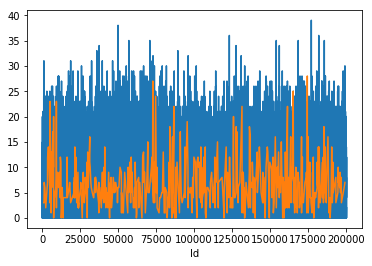

In [49]:
((X_suc.std()*1.96)<X_suc.abs()).astype(int).sum(axis=1).plot()
((X_suc.std()*1.96)<X_fai.abs()).astype(int).sum(axis=1).plot()


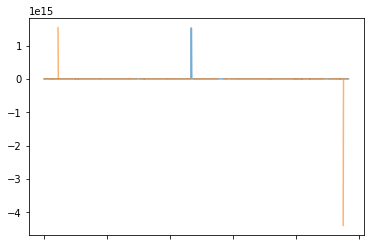

In [10]:
((X_suc.mean()) / X_suc.std()).plot(alpha=0.6)
((X_fai.mean()) / X_fai.std()).plot(alpha=0.6)

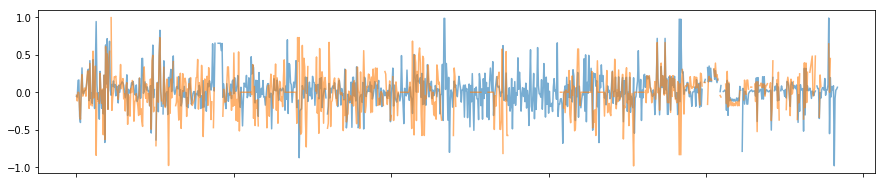

In [18]:
((X_suc.mean() - X_suc.median()) / X_suc.std()).plot(alpha=0.6)
((X_fai.mean() - X_fai.median()) / X_fai.std()).plot(alpha=0.6)

(-100, 100)

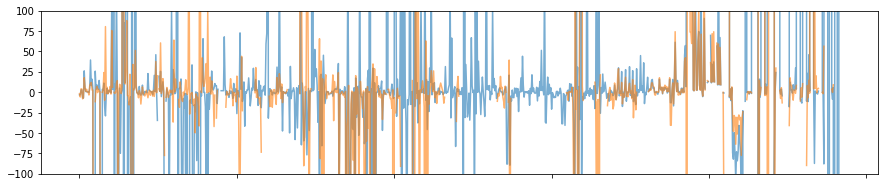

In [24]:
(X_suc.skew() / X_suc.std()).plot(alpha=0.6)
(X_fai.skew() / X_fai.std()).plot(alpha=0.6)
plt.ylim(-100,100)

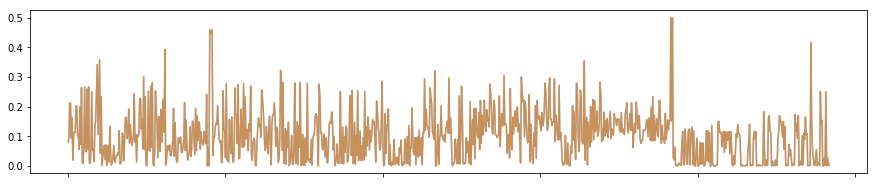

In [26]:
(X_suc.std()).plot(alpha=0.6)
(X.std()).plot(alpha=0.6)

(0, 0.0002)

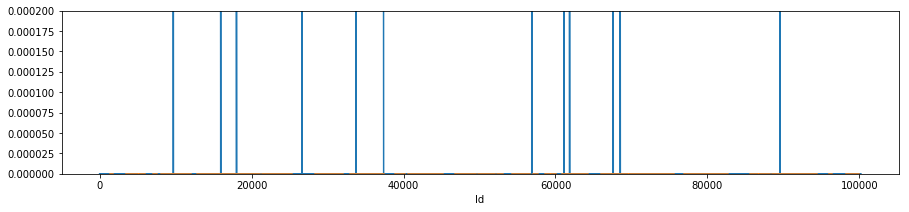

In [37]:
X_suc.loc[:,X_suc.skew().idxmax()].plot()
X_fai.loc[:,X_suc.skew().idxmax()].plot()
plt.ylim(0, 0.0002)

In [79]:
X_fai['L0_S0_F0_dup'] = X_fai["L0_S0_F0"].duplicated().values

C:\Users\tmiya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [71]:
f = []
for i in range(0,len(X_fai)):
    d = []
    for j in range(0,len(X_suc)):
        if i != j:
            d.append((X_fai.iloc[i,:] == X_suc.iloc[j,:]).astype(int).sum())
    f.append(np.max(d))


KeyboardInterrupt: 

# 異常データの特徴を見ていく

In [38]:
y = pd.read_csv('../input/train_numeric.csv', index_col=0, usecols=[0,969])

C:\Users\tmiya\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [44]:
print("%d" % x: x in y.loc[y["Response"]==0,:].index))

SyntaxError: invalid syntax (<ipython-input-44-77ab6faaec98>, line 1)

In [46]:
X = pd.read_csv('../input/train_numeric.csv', index_col=0, skiprows=lambda x: x in y.loc[y["Response"]==0,:].index, usecols = list(range(969)))

KeyboardInterrupt: 